# Método de Adam-Moulton (Aula 27/10)

## Método Preditor-Corretor

- Implícito - Método Corretor (Moulton)
- Expícito - Método Preditor (Bashfort)

In [1]:
import numpy as np

In [2]:
# Analítica e derivada
def analitf(t): 
    return (t+1.0)**2 - np.exp(t)/2.0


def f(tau, W): 
    return W - tau**2 + 1.0

In [3]:
# # #Derivada
# def f(t,bi):
#     k = 0.01
#     return k*(1-bi)*bi

# #Analítica
# def analitf(t,bo): 
#     return 1/(1+((1/bo)-1)* np.exp(-0.01*t))

## Método Preditor- Corretor - B2/M2

In [10]:
def euler_bashforth(t, y0, h):
    t = x
    y = np.zeros(len(x))
    py = np.zeros(len(x))
    y[0] = y0
    K1 = f(x[0] , y[0])
    y [1] = y [0] + 0.5* h *(K1)

    for i in np.arange(1, len(x)-1):
        py[i] = y[i]+0.5*h*(3*f(x[i],y[i]) - f(x[i-1], y[i-1]))
        y[i+1] = y[i]+0.5*h*(f(x[i],py[i]) + f(x[i-1], y[i-1]))  
    return y         

In [11]:
#domínios
a  = 0.0
b  = 2.0
y0 = 0.5  #PVI condição inicial
n  = 0   # Número de interações
h  = 0.01  #intervalo (delta) h=(b-a)/100
#h  = 0.1 
t = np.arange(a, b, h) #ou t
len(t)

200

In [41]:
F = euler_bashforth(x, y0, h)
# print (f'Solução Euler: {F}')
len(F)

200

In [40]:
analic = analitf(x)
# analic = analitf(x,y0)
# print (f'Solução Analítica: {analic}')
len(analic)

200

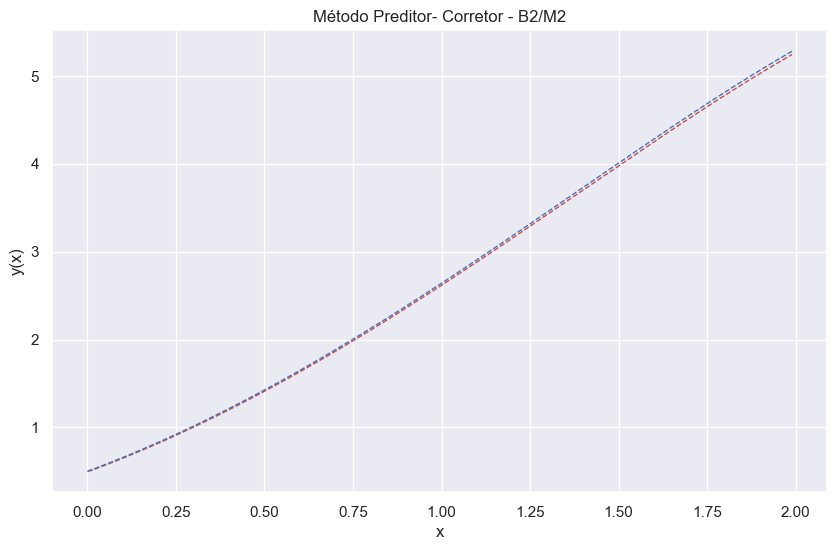

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale = 1, font='sans serif')
plt.figure(figsize=(10,6), facecolor = "#FFF")

plt.figure(1)
plt.rcParams.update({'font.size': 10})
plt.plot(x, F, 'r--', linewidth = 1, label = 'Preditor-Corretor: B2/M2')
plt.plot(x, analic, 'b--', linewidth = 1, label = 'Analítica')
plt.title('Método Preditor- Corretor - B2/M2')
plt.xlabel('x')
plt.ylabel('y(x)')
#plt.legen(['Euler'])
plt.grid(True)
plt.show()

## Método Preditor-Corretor: B3/M4

In [26]:
# # Método Adams-Bashforth 4 passos
def rk4_ (f, t, y, h, n) :
    for _ in range (n) :
        k1 = h * f (t , y )
        k2 = h * f ( t + 0.5* h , y + 0.5* k1 )
        k3 = h * f ( t + 0.5* h , y + 0.5* k2 )
        k4 = h * f ( t + h , y + k3 )
        y += ( k1 + 2* k2 + 2* k3 + k4 ) / 6
        t +=h
    return y



# # Preditor-Corretor
def Adams_Bashforth_Moulton(t, y0, h):
    n = len(t)
    y = np.zeros(len(t))
    y[0] = y0
    
    for i in np.arange (0 , 3):
        y[i + 1] = rk4_(f, t[i], y[i], h, 2)
    
    K1 = f(t[1], y[1])
    K2 = f(t[0], y[0])
    
    for i in range(2, len(t) - 1):
        K3 = K2
        K2 = K1
        K1 = f(t[i], y[i])
        # Adams-Bashforth Predictor
        y[i + 1] = y[i] + h * (23 * K1 - 16 * K2 + 5 * K3) / 12
        K0 = f(t[i + 1], y[i + 1])
        # Adams-Moulton Corrector
        y[i + 1] = y[i] + h * (9 * K0 + 19 * K1 - 5 * K2 + K3) / 24
    return y

In [27]:
def Adams_Bashforth(t, y0, h):
    n = len(t)
    y = np.zeros(len(t))
    y[0] = y0

    for i in range(0, 3):
        y[i + 1] = rk4_(f, t[i], y[i], h, 2)
        
    K3 = f(t[0], y[0])
    K2 = f(t[1], y[1])
    K1 = f(t[2], y[2])
    K0 = f(t[3], y[3])  
    for i in range(3, n - 1):
        K3 = K3
        K2 = K2
        K1 = K1
#         # Adams-Bashforth 3 passos
#         y[i + 1] = y[i] + h * (23 * K1 - 16 * K2 + 5 * K3) / 12
        K0 = K0
#         y[i + 1] = y[i] + h * (9 * K0 + 19 * K1 - 5 * K2 + K3) / 24 #Adams-Moulton 4 passos
        # Adams-Bashforth 4 passos
        y[i + 1] = y[i] + h * (55 * K0 - 59 * K1 + 37 * K2 - 9 * K3) / 24

    return y

In [29]:
adams_bashforth_result = Adams_Bashforth(t, y0, h)
Adams_Bashforth_Moulton_result = Adams_Bashforth_Moulton(t, y0, h)
analitf1 = analitf(t)

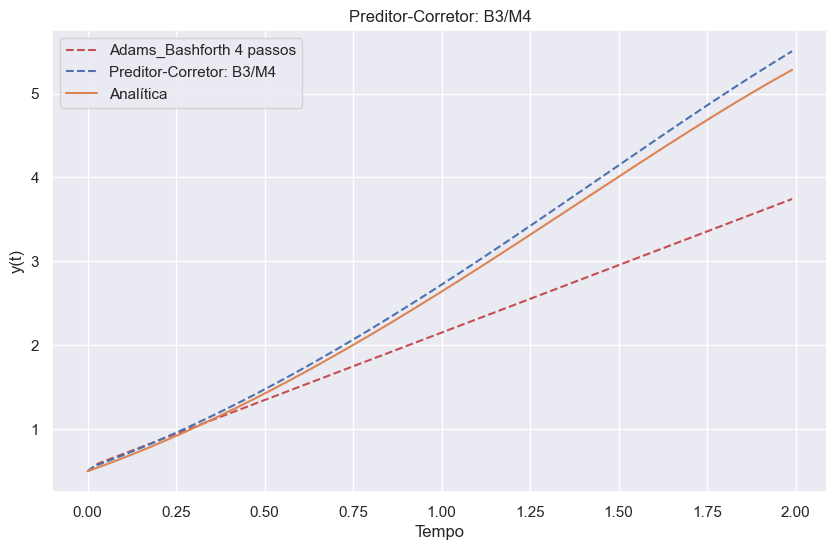

In [44]:
#'Euler - Ct'
plt.figure(figsize=(10, 6))
plt.plot(t, adams_bashforth_result, 'r--', label='Adams_Bashforth 4 passos')
plt.plot(t, Adams_Bashforth_Moulton_result, '--',label='Preditor-Corretor: B3/M4')
plt.plot(t, analitf1 , label='Analítica')

plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.title('Preditor-Corretor: B3/M4')
plt.show()

## Método Preditor-Corretor: B4/M4

In [52]:
# # Método Adams-Bashforth 4 passos
def rk4_ (f, t, y, h, n) :
    for _ in range (n) :
        k1 = h * f (t , y )
        k2 = h * f ( t + 0.5* h , y + 0.5* k1 )
        k3 = h * f ( t + 0.5* h , y + 0.5* k2 )
        k4 = h * f ( t + h , y + k3 )
        y += ( k1 + 2* k2 + 2* k3 + k4 ) / 6
        t +=h
    return y

# # Preditor-Corretor
def Adams_Bashforth_Moulton(t, y0, h):
    n = len(t)
    y = np.zeros(len(t))
    yp = np.zeros(len(t))
    y[0] = y0
    
    for i in np.arange (0 , 3):
        y[i + 1] = rk4_(f, t[i], y[i], h, 2)
    
    K1 = f(t[1], y[1])
    K2 = f(t[0], y[0])
    
    for i in range(2, len(t) - 1):
        K3 = K2
        K2 = K1
        K1 = f(t[i], y[i])
        K0 = f(t[i + 1], y[i + 1])
        # Adams-Bashforth Predictor: 4
        yp[i] = y[i] + h * (55 * K0 - 59 * K1 + 37 * K2 - 9 * K3) / 24
        # Adams-Moulton Corrector: 4
        K0 = f(t[i + 1], yp)
        y[i + 1] = y[i] + h * (9 * K0 + 19 * K1 - 5 * K2 + K3) / 24
    return y

In [54]:
Adams_Bashforth_Moulton_result = Adams_Bashforth_Moulton(t, y0, h)
analitf1 = analitf(t)

ValueError: setting an array element with a sequence.

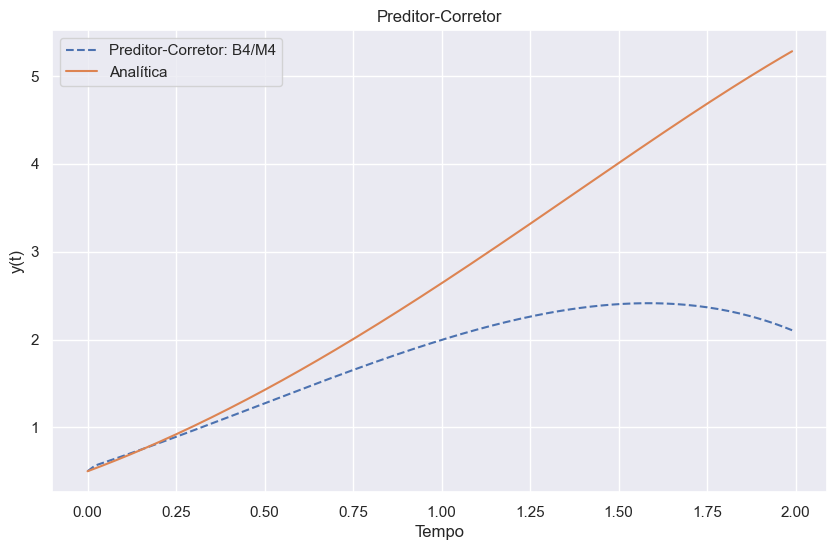

In [51]:
#'Euler - Ct'
plt.figure(figsize=(10, 6))
plt.plot(t, Adams_Bashforth_Moulton_result, '--',label='Preditor-Corretor: B4/M4')
plt.plot(t, analitf1 , label='Analítica')

plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.legend()
plt.grid(True)
plt.title('Preditor-Corretor')
plt.show()